# scikit-learn

## 데이터 표현 방식

### 테이블로서의 데이터

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 데이터 시각화

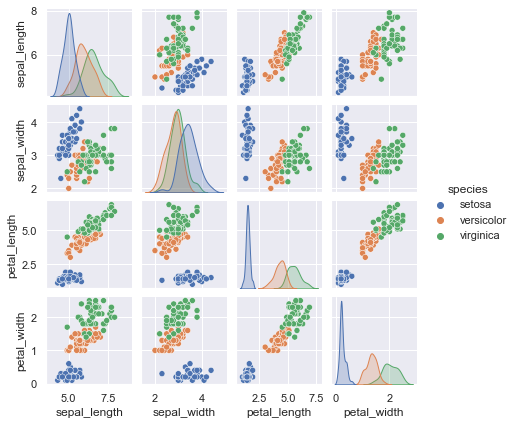

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

### 특징 행렬 과 대상 배열

In [3]:
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)

y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


### 선형 회귀

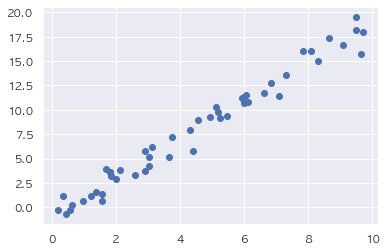

In [62]:
# 데이터 생성
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [63]:
#모델 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [64]:
#데이터 구조 파악
X = x[:, np.newaxis]
X.shape

(50, 1)

In [65]:
# 훈련
model.fit(X, y)

#결과 확인
print(model.coef_)
print(model.intercept_)

[1.9776566]
-0.9033107255311164


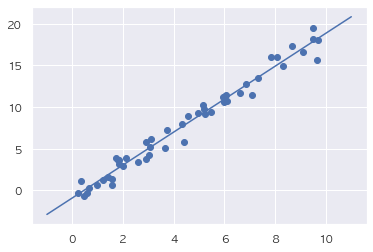

In [66]:
#예측
xfit = np.linspace(-1, 11)

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit)

### 붓꽃 데이터 분류

In [69]:
#데이터 생성
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=42)

In [70]:
#분류 모델 훈현
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)   

In [71]:
#분류 모델 결과 확인
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

1.0

### 숫자 이미지 분류

In [78]:
#데이터 가져오기
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

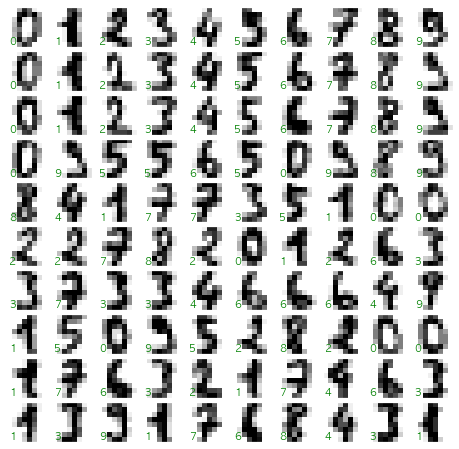

In [79]:
# 데이터 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [80]:
X = digits.data
print(X.shape)

y = digits.target
print(y.shape)

(1797, 64)
(1797,)


In [81]:
#데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [82]:
#분류 모델을 이용한 훈련
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [83]:
#정확도 확인
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8555555555555555

Text(88.18, 0.5, 'true value')

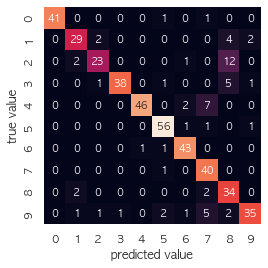

In [84]:
#오차 행렬
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

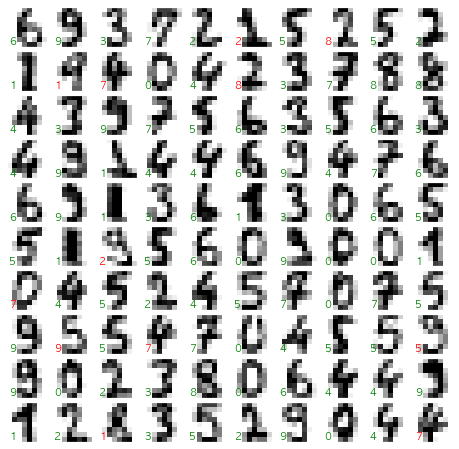

In [85]:
# 모델 오류 분석
#올바른 레이블에 녹색 잘못된 레이블에 빨강색 출력
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

### 차원 축소

In [72]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

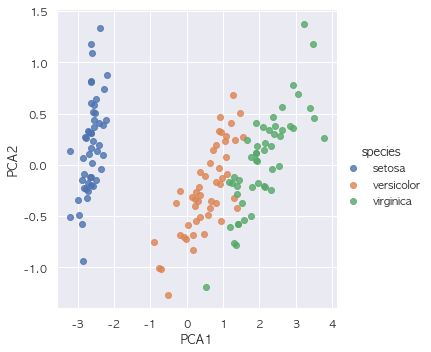

In [74]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

### 군집

In [76]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


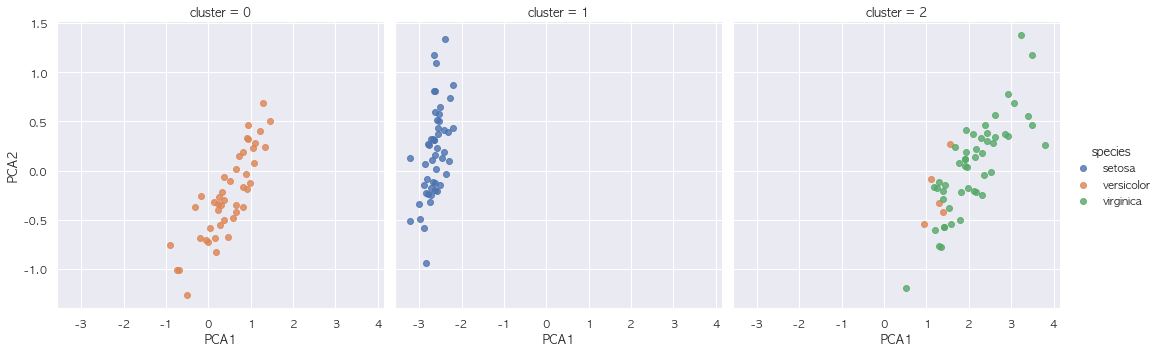

In [77]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## Machine Learning Project

### 데이터 읽어오기 - 데이터 파악

In [4]:
import pandas as pd

housing = pd.read_csv("./data/housing.csv")
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
#데이터의 개략적인 정보 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#ocean_proximity 특성의 분포 확인
print(housing['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [7]:
#숫자 컬럼의 개략 정보 확인
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

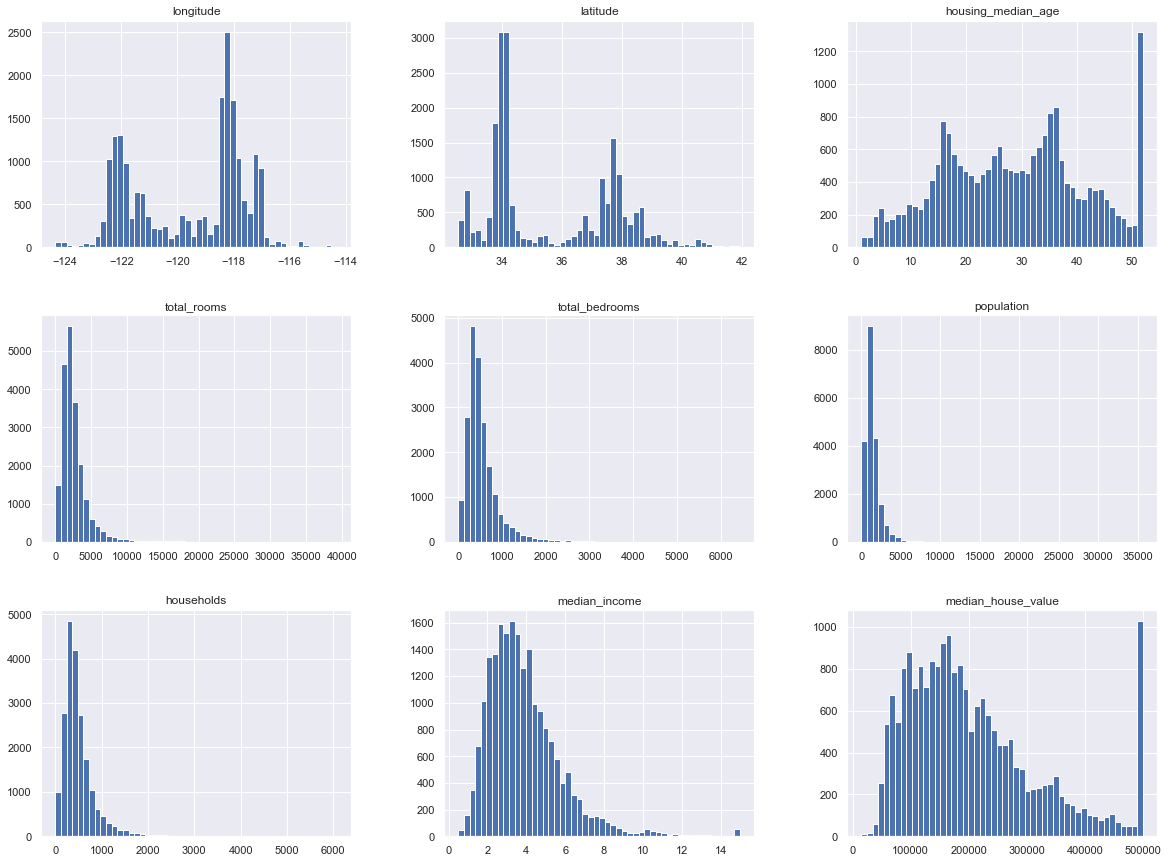

In [8]:
#모든 특성의 히스토그램 출력
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plot", format="png", dpi=300)
plt.show()

### 테스트 데이터 만들기

In [9]:
import numpy as np

#난수 설정 - 항상 동일한 테스트 데이터를 사용하기 위한 목적
np.random.seed(42)

#데이터와 테스트 데이터의 비율을 매개변수로 받아서 테스트 데이터를 리턴해주는 함수
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#8:2의 비율로 데이터를 분할하도록 함수를 호출
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [10]:
from zlib import crc32
# &연산은 파이썬 2 와의 호환성 때문
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [12]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [13]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

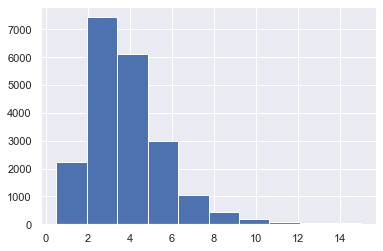

In [15]:
#중간 소득의 히스토그램
housing["median_income"].hist()

In [16]:
#pd.cutO 함수를 사용해 카테고리 5개를 가진 카테고리 특성을 생성
#1에서 5까지 테이블을 가짐
#카태고리 1은 0에서 1.5까지 범위(즉 $15，000 이하)이고 카태고리 2는 1.5에서 3까지 범위가 되는 식입
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

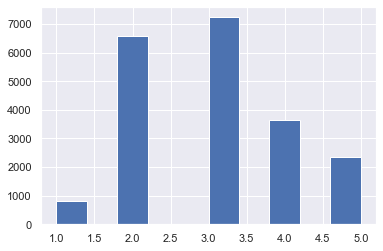

In [17]:
#히스토그램 확인
housing["income_cat"].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
#계층적 분할을 위한 객체 생성
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#income_cat 특성을 이용해서 계층적 분할
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
#데이터 비율 확인
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [19]:
#전체 데이터에서 계층적 샘플링을 한 경우와 무작위 샘플링을 한 경우의 데이터 비교
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"]
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"]
print(compare_props)

    Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039971  0.040213    100.973236     100.364964
2  0.318847    0.318798  0.324370    101.732260      99.984805
3  0.350581    0.350533  0.358527    102.266446      99.986180
4  0.176308    0.176357  0.167393     94.943666     100.027480
5  0.114438    0.114341  0.109496     95.681626      99.915326


### 데이터 이해를 위한 탐색

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


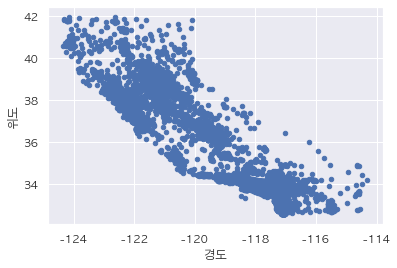

In [20]:
#원본 데이터 보존을 위해서 복제
housing = strat_train_set.copy()
#산포도 출력
import platform
from matplotlib import font_manager, rc
import matplotlib
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
#우분투 리눅스의 경우
else:
    font_name = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    rc('font', family=font_name)
    
#음수 출력
matplotlib.rcParams['axes.unicode_minus'] = False

#위도와 경도를 이용한 산포도
housing = strat_train_set.copy()
ax = housing.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel='경도', ylabel='위도')
plt.savefig("bad_visualization_plot", format="png", dpi=300 )


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


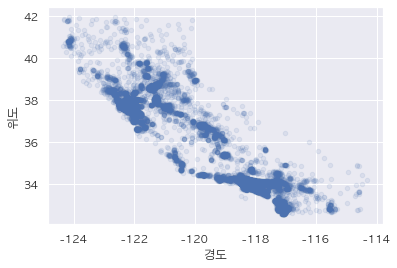

In [21]:
#알파값 조정 : 조금 더 구분이 잘됨
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')
plt.savefig("better_visualization_plot", format="png", dpi=300)

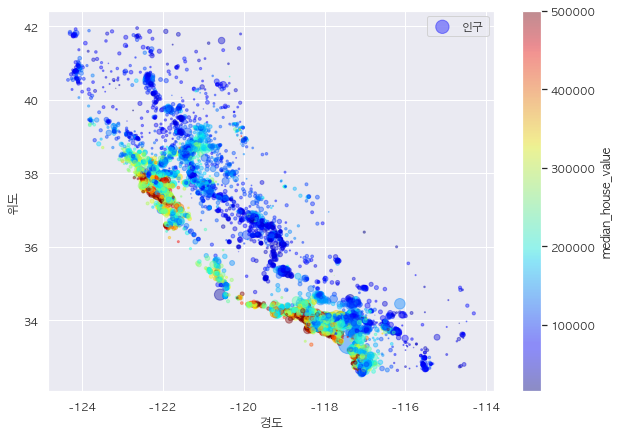

In [22]:
#주택 가격을 색상으로 설정한 시각화
#s - 원의 반지름 - 인구
#c - 색상 - 주택 가격
#cmap - jet - 파란색에서 빨간색으로 갈수록 범위가 커지는 컬러 맵
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend()
plt.savefig("housing_prices_scatterplot", format="png", dpi=300)

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_4186/2082984230.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_4186/2082984230.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


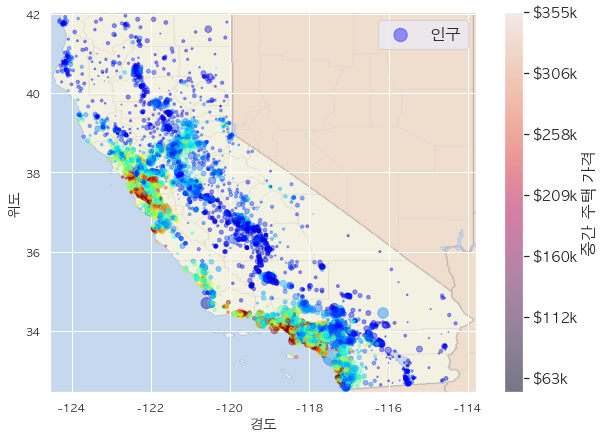

In [23]:
import matplotlib.image as mpimg
california_img=mpimg.imread('./data/images/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="인구",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("위도", fontsize=14)
plt.xlabel("경도", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('중간 주택 가격', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("california_housing_prices_plot", format="png", dpi=300)
plt.show()

In [24]:
#모든 특성의 상관계수 찾기
corr_matrix = housing.corr()
#평균 주택 가격과의 상관계수만 출력
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


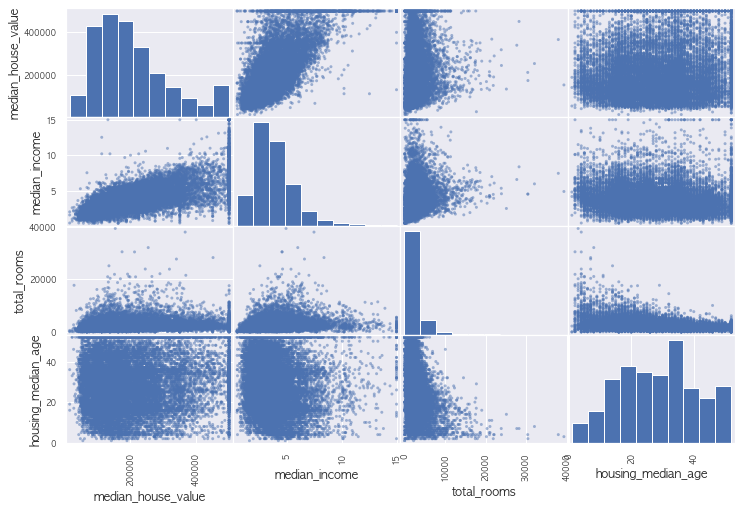

In [25]:
#주택 가격 과의 상관 관계 파악 : 산점도를 이용한 확인
from pandas.plotting import scatter_matrix
#상관관계를 파악할 특성
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot", format="png", dpi=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


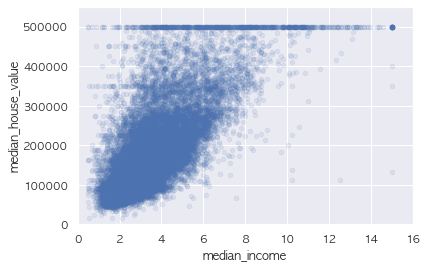

In [26]:
#소득과 주택가격의 산점도
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.savefig("income_vs_house_value_scatterplot", format='png', dpi=300)

In [27]:
#새로운 특성 만들기
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

#상관계수 구하기
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


## 데이터 준비

In [28]:
#훈련 데이터 복제 – 레이블을 제외한 데이터 복제
housing = strat_train_set.drop("median_house_value", axis=1) 
#훈련 세트를 위해 레이블 삭제
#레이블에 변형을 적용하지 않기 위해서 레이블값도 복제
housing_labels = strat_train_set["median_house_value"].copy()

## 데이터 전처리

In [29]:
#NaN을 가진 데이터 찾기
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [30]:
#누락된 구역 제거
housing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [31]:
#특성 제거
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN,5


In [32]:
#중간값으로 대체
#계산한 중간값을 저장
#나중에 시스템을 평가할 때 태스트 세트에 있는 누락된 값과 시스템을 실제 운영될 때 새로운 데이터에 있는 누락된 값을 채워넣는데 필요
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

print(imputer.statistics_)

print(housing_num.median().values)

#훈련 데이터 변환
X = imputer.transform(housing_num)
#변환된 데이터를 DataFrame으로 변환
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))
#데이터 확인
housing_tr.loc[sample_incomplete_rows.index.values]

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155    3.     ]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_4186/898249391.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(housing_num.median().values)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,2.0
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,3.0
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,3.0
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,3.0
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,5.0


In [34]:
#변환기의 하이퍼파라미터 확인
print(imputer.strategy)

#데이터 확인
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

median


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0


In [35]:
#범주형 특성의 데이터 가져오기
housing_cat = housing['ocean_proximity']
print(housing_cat.head(10))
print()

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object



In [36]:
#범주형을 정수 데이터로 변환
housing_cat_encoded, housing_categories = housing_cat.factorize()
print(housing_cat_encoded[:10])
print()

#변환된 데이터의 카테고리 확인
print(housing_categories)

[0 1 0 1 2 3 2 2 2 2]

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')


In [37]:
from sklearn.preprocessing import OrdinalEncoder
#범주형 특성의 데이터 가져오기
housing_cat = housing[["ocean_proximity"]]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
#categories_ 인스턴스 변수를 사용해 카테고리 목록을 얻을 수 있음
#범주형 특성마다 카태고리들의 lD 배열을 담은 리스트를 반환
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
from sklearn.preprocessing import OneHotEncoder
#원핫인코더 객체 생성
encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

#희소행렬 출력
print(housing_cat_1hot[:5])

print()
#밀집행렬 출력
print(housing_cat_1hot.toarray()[:5])

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


In [40]:
cat_encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)

print(housing_cat_1hot[:5])
print()

print(cat_encoder.categories_)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


### Custom 변환기

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [42]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())
print(housing_extra_attribs)

[[-121.46 38.52 29.0 ... 2 5.485835694050992 3.168555240793201]
 [-117.23 33.09 7.0 ... 5 6.927083333333333 2.6236979166666665]
 [-119.04 35.37 44.0 ... 2 5.3933333333333335 2.223333333333333]
 ...
 [-122.72 38.44 48.0 ... 3 4.1104651162790695 2.6627906976744184]
 [-122.7 38.31 14.0 ... 3 6.297405189620759 2.411177644710579]
 [-122.14 39.97 27.0 ... 3 5.477157360406092 3.1725888324873095]]


In [43]:
#housing_extra_attribs는 넘파이 배열이기 때문에 열 이름이 없음
#사이킷 런을 사용할 때 생기는 문제
#DataFrame으로 복원하려면 다음과 같이 할 수 있습니다:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,3.167241


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#NaN을 중간값으로 변경하고 표준화를 수행
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
print(housing_num_tr)

[[-0.94135046  1.34743822  0.02756357 ...  0.55628602 -0.8936472
  -0.95468705]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.72131799  1.292168
   1.89007821]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.52440722 -0.52543365
  -0.95468705]
 ...
 [-1.5707942   1.31001828  1.53856552 ... -0.86511838 -0.36547546
  -0.00643196]
 [-1.56080303  1.2492109  -1.1653327  ...  0.01061579  0.16826095
  -0.00643196]
 [-1.28105026  2.02567448 -0.13148926 ... -0.79857323 -0.390569
  -0.00643196]]


In [45]:
#최신 sklearn 패키지에는 특성 별로 별도의 변환기를 적용하는 ColumnTransformer가 추가
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
#숫자에는 위에서 만든 파이프라인을 범주혀에는 원핫인코딩을 적용하기
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(categories='auto'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]


In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 생성
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    num_attribs = list(housing_num)
    
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(categories='auto', sparse=False)),
    ])

full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_encoder", OneHotEncoder(categories='auto'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)
print()

print(housing_prepared.shape)

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]

(16512, 14)


## 모델 선택 과 훈련

In [47]:
from sklearn.linear_model import LinearRegression

#선형 회귀 적용
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 보겠습니다.
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [ 87710.9184376  312666.78080576 148193.92872405 181973.84391033
 242269.47566914]
레이블: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68866.78550087014


In [49]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print(lin_mae)

50004.68241084856


In [50]:
#DecisionTreeRegressor를 이용한 훈련 및 평가
from sklearn .tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


In [51]:
#k-fold cross validation 검증
#의사 결정 모델
from sklearn .model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error" , cv=10)
tree_rmse_scores = np .sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores) 

Scores: [70057.83449845 70997.63344057 65388.62218588 69907.24308437
 67871.99014821 68553.98959716 74440.91898076 69680.06037746
 66494.30933087 71362.55277542]
Mean: 69475.51544191419
Standard deviation: 2451.756470120408


In [52]:
#선형 회귀 모델
lin_scores = cross_val_score(lin_reg , housing_prepared , housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np .sqrt(-lin_scores)
display_scores(lin_rmse_scores) 

Scores: [72098.22665202 65263.25382431 67474.73970669 69344.34356573
 66405.23454953 72763.65486499 70271.51498924 69326.8790595
 66674.88791569 70584.58383018]
Mean: 69020.731895787
Standard deviation: 2377.8463322927105


In [53]:
#랜덤 포리스트 모델
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared , housing_labels)
forest_scores = cross_val_score(forest_reg , housing_prepared , housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50630.09239892 49467.65360336 46273.92238605 50679.83377361
 47073.62583622 49062.14957392 51577.74985465 48727.08192429
 47797.9456466  52862.32826185]
Mean: 49415.23832594643
Standard deviation: 1954.5226005616307


## 모델 세부 튜닝

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합을 시도
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 폴드에서 훈련하면 총 (12+6)*5=90번의 훈련
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
#탐색 범위의 최대값
print(grid_search.best_params_)
print()

#최적의 추정기에 직접 접근
print(grid_search.best_estimator_)

{'max_features': 8, 'n_estimators': 30}

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


In [56]:
#평가 점수 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65122.905837817285 {'max_features': 2, 'n_estimators': 3}
56006.896543364885 {'max_features': 2, 'n_estimators': 10}
53209.5910700205 {'max_features': 2, 'n_estimators': 30}
61103.65813876949 {'max_features': 4, 'n_estimators': 3}
54200.2308216665 {'max_features': 4, 'n_estimators': 10}
51823.88180716551 {'max_features': 4, 'n_estimators': 30}
60898.87462080078 {'max_features': 6, 'n_estimators': 3}
53554.18953951147 {'max_features': 6, 'n_estimators': 10}
51617.71575557607 {'max_features': 6, 'n_estimators': 30}
58587.79038117453 {'max_features': 8, 'n_estimators': 3}
52897.55947038159 {'max_features': 8, 'n_estimators': 10}
50855.687085808444 {'max_features': 8, 'n_estimators': 30}
63152.90164807789 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55323.1855510554 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60613.86436563096 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53443.164463628535 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [57]:
#랜덤 탐색
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


50164.537656536944 {'max_features': 7, 'n_estimators': 180}
52671.76460741638 {'max_features': 5, 'n_estimators': 15}
51607.54167972682 {'max_features': 3, 'n_estimators': 72}
52152.056127186086 {'max_features': 5, 'n_estimators': 21}
50231.4864759921 {'max_features': 7, 'n_estimators': 122}
51591.97298859319 {'max_features': 3, 'n_estimators': 75}
51511.44520982 {'max_features': 3, 'n_estimators': 88}
50827.82241631088 {'max_features': 5, 'n_estimators': 100}
51464.16900591594 {'max_features': 3, 'n_estimators': 150}
67032.49275468505 {'max_features': 5, 'n_estimators': 2}


In [58]:
#중요도 출력
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[1.01756588e-01 9.07346355e-02 5.37492403e-02 2.88369992e-02
 2.92167548e-02 3.86828066e-02 2.67367941e-02 3.67918825e-01
 1.16134388e-01 7.79818722e-03 1.30505661e-01 8.23558011e-05
 2.00402726e-03 5.84273809e-03]


In [59]:
#특성 이름과 함께 출력
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_encoder = full_pipeline.named_transformers_["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3679188250337754, 'median_income'),
 (0.13050566069790687, 'pop_per_hhold'),
 (0.11613438766293631, 'income_cat'),
 (0.10175658771343808, 'longitude'),
 (0.09073463553758108, 'latitude'),
 (0.05374924027593786, 'housing_median_age'),
 (0.038682806631431525, 'population'),
 (0.02921675475243719, 'total_bedrooms'),
 (0.028836999186947192, 'total_rooms'),
 (0.026736794136632925, 'households'),
 (0.0077981872224691705, 'rooms_per_hhold'),
 (0.0058427380861845995, 'INLAND'),
 (0.0020040272611729923, '<1H OCEAN'),
 (8.23558011487748e-05, 'bedrooms_per_room')]

In [60]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value" , axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48329.2861803876


In [61]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46362.78424771, 50218.84150607])

### 검증 곡선

In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#다항 회귀 모델 생성을 위한 함수
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [100]:
import numpy as np
#데이터 생성을 위한 함수
def make_data(N, err=1.0, rseed=42):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

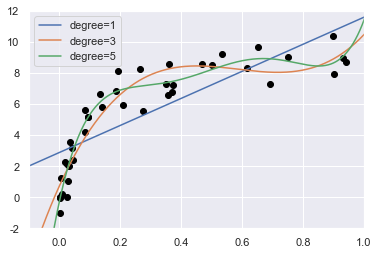

In [101]:
#다항 회귀 모델 생성 및 훈련
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

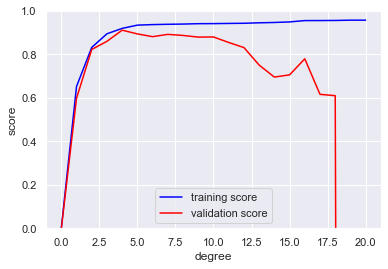

In [102]:
#검증 곡선 그리기
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
    
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name = 'polynomialfeatures__degree', param_range = degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

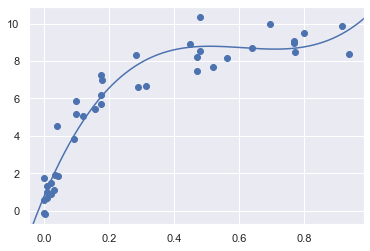

In [98]:
#검증 곡선을 이용한 최적의 하이퍼 파라미터를 이용한 모델 생성
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### 학습 곡선

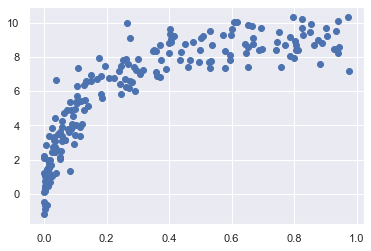

In [103]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

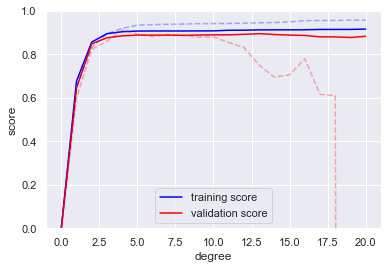

In [105]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                          param_name = 'polynomialfeatures__degree', param_range = degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

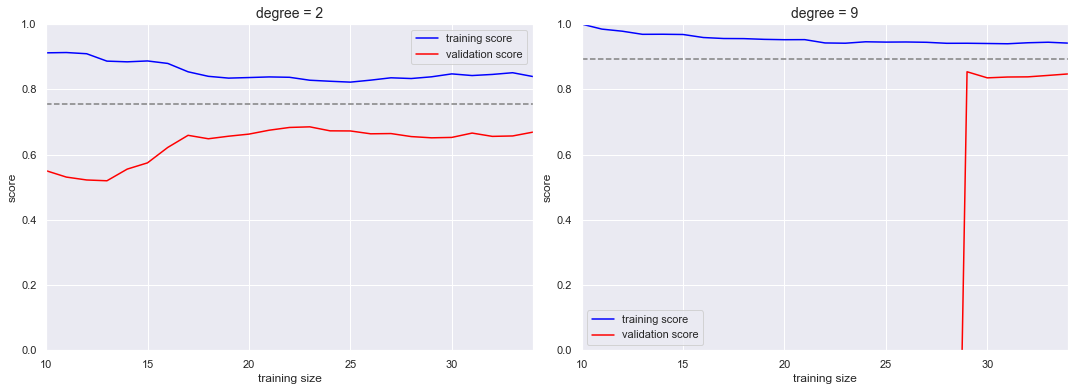

In [107]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')